retrieving "D:\projects\car-license-plate-recognition\doc\problem\placas\141002\Pa140022.jpg.pkz"


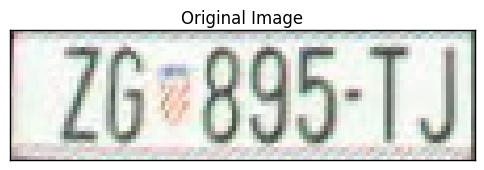

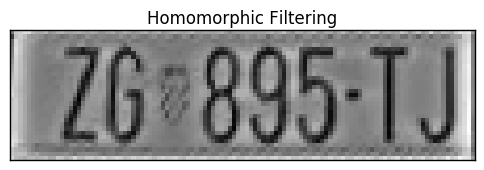

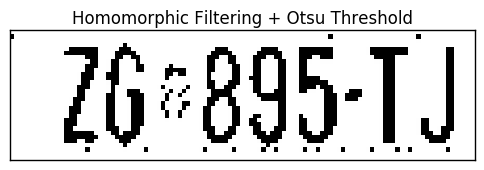

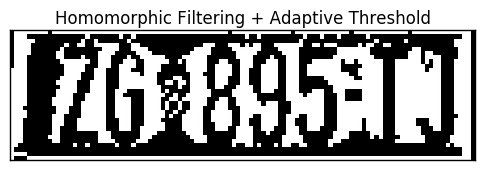

In [24]:
% matplotlib inline

import os
import cv2
import matplotlib.pyplot as plt
from plate import detect, segment, noise, roi, binarization
import numpy as np

img_path = "D:\\projects\\car-license-plate-recognition\\doc\\problem\\placas\\141002\\Pa140022.jpg"
# img_path = "D:\\projects\\car-license-plate-recognition\\doc\\problem\\placas\\141002\\Pa140015.jpg"
# img_path = "D:\\projects\\car-license-plate-recognition\\doc\\problem\\placas\\141002\\Pa140028.jpg"
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# plate points retrieving
points = []
points_path = img_path + '.pkz'
if os.path.exists(points_path):
    points = roi.retrieve(points_path, decompress=False)
else:
    print(img_path, ' points file for plate not found')
    exit(1)

# plate segmentation
plates = segment.segment_plates(img, [points])
gray = cv2.cvtColor(plates[0], cv2.COLOR_RGB2GRAY)
h, w = gray.shape

# noise filtering
filtered = noise.homomorphic(gray, 0.1, 1.)

plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.imshow(plates[0], interpolation='none')
plt.show()

plt.title('Homomorphic Filtering'), plt.xticks([]), plt.yticks([])
plt.imshow(filtered, cmap='gray', interpolation='none')
plt.show()

# binarization
_, filtered_bin = cv2.threshold(filtered, 0, 255, cv2.THRESH_OTSU)
plt.imshow(filtered_bin, cmap = 'gray', interpolation='none')
plt.title('Homomorphic Filtering + Otsu Threshold'), plt.xticks([]), plt.yticks([])
plt.show()

window_size = ((h>>1)<<1)+1
filtered_bin = cv2.adaptiveThreshold(filtered, 255, cv2.THRESH_BINARY_INV, cv2.ADAPTIVE_THRESH_MEAN_C, window_size, 0)
plt.imshow(filtered_bin, cmap = 'gray', interpolation='none')
plt.title('Homomorphic Filtering + Adaptive Threshold'), plt.xticks([]), plt.yticks([])
plt.show()

# filtered_bin = binarization.auto_canny(filtered)
# plt.title('Homomorphic Filtering + Canny Edges'), plt.xticks([]), plt.yticks([])
# plt.imshow(filtered_bin, cmap = 'gray', interpolation='none')
# plt.show()

# laplacian = cv2.Laplacian(filtered, cv2.CV_64F)
# laplacian = cv2.normalize(laplacian, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)
# plt.imshow(laplacian, cmap = 'gray', interpolation='none')
# plt.title('Homomorphic Filtering + Laplacian'), plt.xticks([]), plt.yticks([])
# plt.show()

# window_size = ((h>>1)<<1)+1
# img_bin = cv2.adaptiveThreshold(laplacian, 255, cv2.THRESH_BINARY_INV, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, window_size, 0)
# plt.imshow(img_bin, cmap = 'gray', interpolation='none')
# plt.title('Homomorphic Filtering + Laplacian + Adaptive Threshold'), plt.xticks([]), plt.yticks([])
# plt.show()


retrieving "D:\projects\car-license-plate-recognition\doc\problem\placas\141002\Pa140028.jpg.pkz"


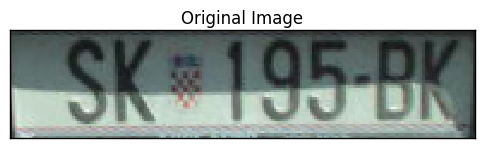

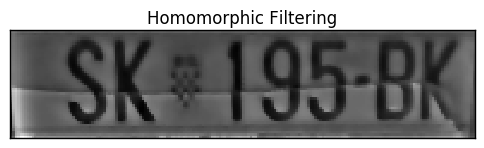

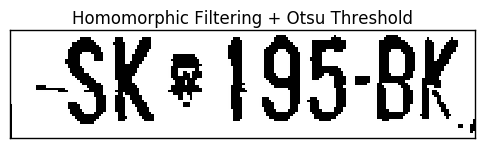

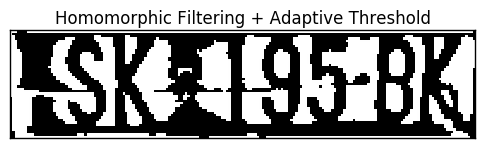

In [22]:
% matplotlib inline

import os
import cv2
import matplotlib.pyplot as plt
from plate import detect, segment, noise, roi, binarization
import numpy as np

# img_path = "D:\\projects\\car-license-plate-recognition\\doc\\problem\\placas\\141002\\Pa140022.jpg"
# img_path = "D:\\projects\\car-license-plate-recognition\\doc\\problem\\placas\\141002\\Pa140015.jpg"
img_path = "D:\\projects\\car-license-plate-recognition\\doc\\problem\\placas\\141002\\Pa140028.jpg"
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# plate points retrieving
points = []
points_path = img_path + '.pkz'
if os.path.exists(points_path):
    points = roi.retrieve(points_path, decompress=False)
else:
    print(img_path, ' points file for plate not found')
    exit(1)

# plate segmentation
plates = segment.segment_plates(img, [points])
gray = cv2.cvtColor(plates[0], cv2.COLOR_RGB2GRAY)
h, w = gray.shape

# bilateral filter
wsize = h>>3
gray = cv2.bilateralFilter(gray, wsize, 30, wsize)

# noise filtering
filtered = noise.homomorphic(gray, 0.1, 1.)

plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.imshow(plates[0], interpolation='none')
plt.show()

plt.title('Homomorphic Filtering'), plt.xticks([]), plt.yticks([])
plt.imshow(filtered, cmap='gray', interpolation='none')
plt.show()

# binarization
_, filtered_bin = cv2.threshold(filtered, 0, 255, cv2.THRESH_OTSU)
plt.imshow(filtered_bin, cmap = 'gray', interpolation='none')
plt.title('Homomorphic Filtering + Otsu Threshold'), plt.xticks([]), plt.yticks([])
plt.show()

window_size = ((h>>1)<<1)+1
filtered_bin = cv2.adaptiveThreshold(filtered, 255, cv2.THRESH_BINARY_INV, cv2.ADAPTIVE_THRESH_MEAN_C, window_size, 0)
plt.imshow(filtered_bin, cmap = 'gray', interpolation='none')
plt.title('Homomorphic Filtering + Adaptive Threshold'), plt.xticks([]), plt.yticks([])
plt.show()

# filtered_bin = binarization.auto_canny(filtered)
# plt.title('Homomorphic Filtering + Canny Edges'), plt.xticks([]), plt.yticks([])
# plt.imshow(filtered_bin, cmap = 'gray', interpolation='none')
# plt.show()

# laplacian = cv2.Laplacian(filtered, cv2.CV_64F)
# laplacian = cv2.normalize(laplacian, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)
# plt.imshow(laplacian, cmap = 'gray', interpolation='none')
# plt.title('Homomorphic Filtering + Laplacian'), plt.xticks([]), plt.yticks([])
# plt.show()

# window_size = ((h>>1)<<1)+1
# img_bin = cv2.adaptiveThreshold(laplacian, 255, cv2.THRESH_BINARY_INV, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, window_size, 0)
# plt.imshow(img_bin, cmap = 'gray', interpolation='none')
# plt.title('Homomorphic Filtering + Laplacian + Adaptive Threshold'), plt.xticks([]), plt.yticks([])
# plt.show()
